In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5728,3374-LXDEV,Female,0,No,No,13,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,89.40,1132.35,Yes
820,4220-TINQT,Female,0,Yes,No,61,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.35,6751.35,No
740,4381-MHQDC,Female,0,No,No,47,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Two year,Yes,Mailed check,65.00,2879.9,No
2807,1015-JPFYW,Male,0,No,Yes,7,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.45,136.75,No
5568,2270-CHBFN,Female,0,Yes,No,44,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),95.10,4060.55,No


# Processing Data

In [3]:
df.drop('customerID', axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values # should be float

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()
# coerce: ignore error

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [6]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]
# 11 rows out of 7000+ rows, we can drop it

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
df.iloc[488]['TotalCharges']

' '

In [8]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [9]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\星辰\AppData\Local\Temp\ipykernel_4420\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [10]:
df1.TotalCharges.dtypes

dtype('float64')

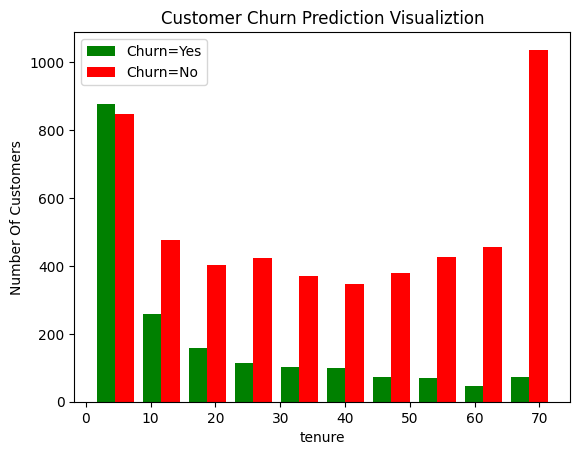

In [11]:
# draw a histogram of tenure

tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

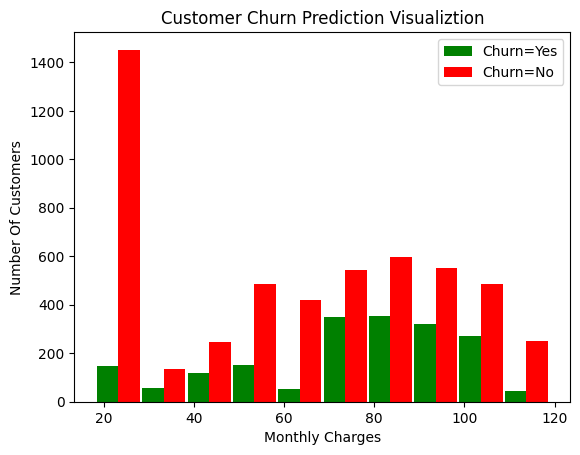

In [12]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [13]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')
            
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [14]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


C:\Users\星辰\AppData\Local\Temp\ipykernel_4420\1997594843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\星辰\AppData\Local\Temp\ipykernel_4420\1997594843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [15]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

df1['gender'].replace({'Female':1,'Male':0},inplace=True)
    
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


C:\Users\星辰\AppData\Local\Temp\ipykernel_4420\3686438052.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)
C:\Users\星辰\AppData\Local\Temp\ipykernel_4420\3686438052.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [16]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [17]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2392,0,0,0,0,20,1,1,0,0,1,...,False,True,False,True,False,False,False,True,False,False
2201,1,0,0,0,36,1,0,1,1,1,...,True,False,False,False,True,False,True,False,False,False
3445,1,0,1,0,46,1,1,0,1,0,...,False,True,False,False,True,False,False,False,True,False
3979,0,0,1,1,66,1,1,0,0,0,...,False,False,True,False,False,True,False,True,False,False
6143,0,0,1,1,50,1,0,0,0,0,...,False,False,True,False,True,False,False,False,False,True


In [18]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [19]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

# Train test spilt

In [20]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn'].to_frame()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

from keras import backend as K
X_train = K.cast_to_floatx(X_train)
X_test = K.cast_to_floatx(X_test)
y_train = K.cast_to_floatx(y_train)
y_test = K.cast_to_floatx(y_test)

X_train.shape

(5625, 26)

In [21]:
X_test.shape

(1407, 26)

In [22]:
X_train[:10]

array([[1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.26760557e-01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 6.60198987e-01, 9.77094397e-02,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.19402986e-02, 7.50057661e-05,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00

In [23]:
X_train.shape

(5625, 26)

In [24]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    # input
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    # hidden
    keras.layers.Dense(15, activation='relu'),
    # output
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200)

Epoch 1/200
176/176 [==============================] - 1s 874us/step - loss: 0.5110 - accuracy: 0.7486
Epoch 2/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.7957
Epoch 3/200
176/176 [==============================] - 0s 982us/step - loss: 0.4188 - accuracy: 0.8002
Epoch 4/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.8027
Epoch 5/200
176/176 [==============================] - 0s 989us/step - loss: 0.4101 - accuracy: 0.8044
Epoch 6/200
176/176 [==============================] - 0s 943us/step - loss: 0.4089 - accuracy: 0.8053
Epoch 7/200
176/176 [==============================] - 0s 998us/step - loss: 0.4057 - accuracy: 0.8080
Epoch 8/200
176/176 [==============================] - 0s 920us/step - loss: 0.4047 - accuracy: 0.8096
Epoch 9/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4036 - accuracy: 0.8100
Epoch 10/200
176/176 [==============================] - 0s 895us/step - loss: 0

176/176 [==============================] - 0s 1ms/step - loss: 0.3551 - accuracy: 0.8352
Epoch 81/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3549 - accuracy: 0.8372
Epoch 82/200
176/176 [==============================] - 0s 950us/step - loss: 0.3547 - accuracy: 0.8347
Epoch 83/200
176/176 [==============================] - 0s 947us/step - loss: 0.3543 - accuracy: 0.8361
Epoch 84/200
176/176 [==============================] - 0s 963us/step - loss: 0.3541 - accuracy: 0.8366
Epoch 85/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3533 - accuracy: 0.8356
Epoch 86/200
176/176 [==============================] - 0s 955us/step - loss: 0.3537 - accuracy: 0.8364
Epoch 87/200
176/176 [==============================] - 0s 967us/step - loss: 0.3534 - accuracy: 0.8363
Epoch 88/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3513 - accuracy: 0.8364
Epoch 89/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3526 - 

176/176 [==============================] - 0s 903us/step - loss: 0.3259 - accuracy: 0.8478
Epoch 160/200
176/176 [==============================] - 0s 925us/step - loss: 0.3255 - accuracy: 0.8457
Epoch 161/200
176/176 [==============================] - 0s 988us/step - loss: 0.3254 - accuracy: 0.8476
Epoch 162/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3251 - accuracy: 0.8521
Epoch 163/200
176/176 [==============================] - 0s 871us/step - loss: 0.3240 - accuracy: 0.8492
Epoch 164/200
176/176 [==============================] - 0s 810us/step - loss: 0.3249 - accuracy: 0.8480
Epoch 165/200
176/176 [==============================] - 0s 966us/step - loss: 0.3246 - accuracy: 0.8500
Epoch 166/200
176/176 [==============================] - 0s 903us/step - loss: 0.3242 - accuracy: 0.8468
Epoch 167/200
176/176 [==============================] - 0s 909us/step - loss: 0.3223 - accuracy: 0.8508
Epoch 168/200
176/176 [==============================] - 0s 921us/step 

In [25]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 999us/step - loss: 0.5675 - accuracy: 0.7548


[0.5674992203712463, 0.7547974586486816]

In [26]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 909us/step


array([[0.09960306],
       [0.5740318 ],
       [0.00577213],
       [0.77247465],
       [0.518224  ]], dtype=float32)

In [27]:
y_test[:10]

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [28]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 0, 0, 1]

In [29]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       999
         1.0       0.59      0.53      0.55       408

    accuracy                           0.75      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.75      0.75      0.75      1407



Text(95.72222222222221, 0.5, 'Truth')

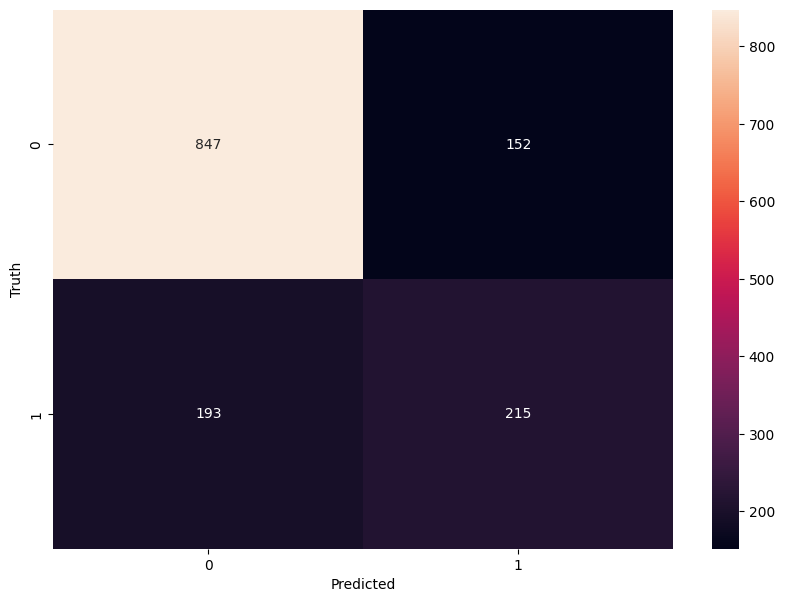

In [30]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
# accuracy for total

round((847+215)/(847+215+193+152),2)

0.75

In [37]:
# precision for 0 class
# truth = 0

round(847/(847+193),2)

0.81

In [38]:
# precision for 1 class
# truth = 1

round(215/(215+152),2)

0.59

In [39]:
# recall for 0 class
# truth = 0

round(847/(847+152),2)

0.85

In [40]:
# recall for 1 class
# truth = 1

round(215/(215+193),2)

0.53